In [27]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from PIL import Image
%matplotlib inline
from tensorflow.keras.optimizers import Adam
import cv2
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras import applications
from tensorflow.keras.models import Model
from keras import optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow import keras

In [2]:
train = pd.read_csv("C:\\Users\\Aayush Kandpal\\Downloads\\14feeca248c811eb\\dataset\\train.csv")
train.head()


,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


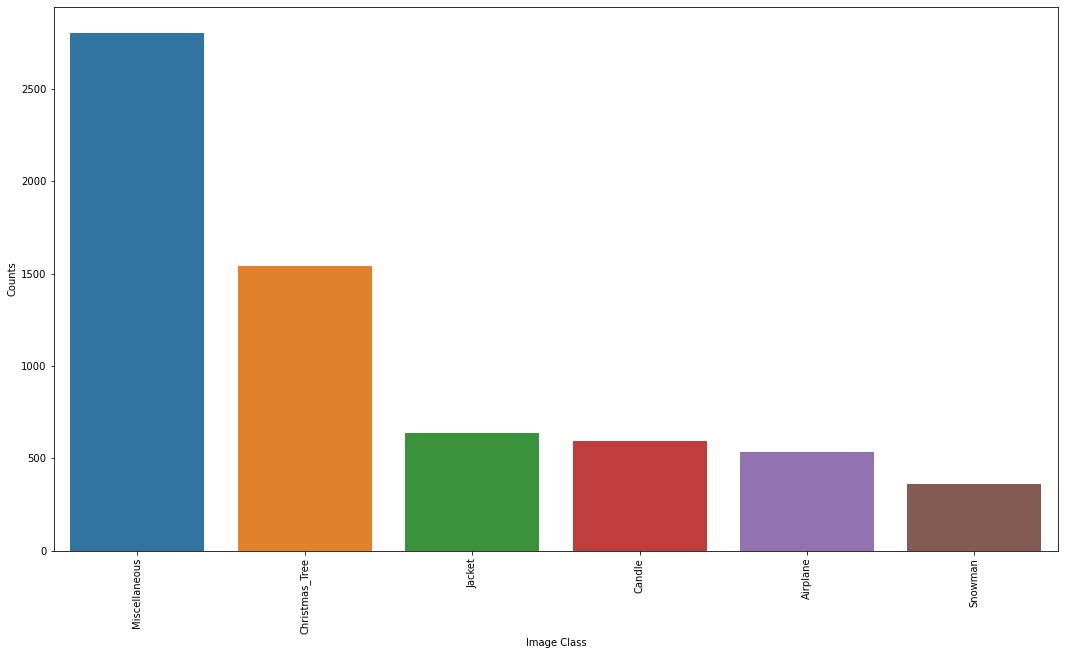

In [3]:
label_counts = train.Class.value_counts()
plt.figure(figsize = (18,10))
sns.barplot(label_counts.index, label_counts.values)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Class', fontsize =10)
plt.ylabel('Counts', fontsize = 10)
plt.show()

In [4]:
TRAIN_PATH ="C:\\Users\\Aayush Kandpal\\Downloads\\14feeca248c811eb\\dataset\\train" 
TEST_PATH = "C:\\Users\\Aayush Kandpal\\Downloads\\14feeca248c811eb\\dataset\\test"

In [5]:
train.shape

(6469, 2)

In [6]:
# let us create a validation set
X=train.Image
y=train.Class
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [   0    1    2 ... 6465 6467 6468] TEST: [   7   18   23 ... 6447 6450 6466]
TRAIN: [   1    2    3 ... 6464 6466 6468] TEST: [   0    4   12 ... 6463 6465 6467]
TRAIN: [   0    1    2 ... 6466 6467 6468] TEST: [   3    6    8 ... 6458 6461 6462]
TRAIN: [   0    3    4 ... 6465 6466 6467] TEST: [   1    2    5 ... 6459 6464 6468]
TRAIN: [   0    1    2 ... 6466 6467 6468] TEST: [  11   14   17 ... 6433 6436 6443]


In [7]:
# Creating our data frames
x_train=pd.DataFrame({'Image':x_train})
y_train=pd.DataFrame({'Class':y_train})
train_kfold=pd.concat([x_train,y_train],axis=1)

x_val=pd.DataFrame({'Image':x_test})
y_val=pd.DataFrame({'Class':y_test})
val_kfold=pd.concat([x_val,y_val],axis=1)

In [8]:
train_kfold.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [9]:
val_kfold.head()

,Image,Class
11,image6764.jpg,Jacket
14,image7076.jpg,Airplane
17,image7391.jpg,Snowman
20,image9387.jpg,Miscellaneous
25,image7418.jpg,Miscellaneous


In [10]:
train_kfold.shape

(5176, 2)

In [11]:
val_kfold.shape

(1293, 2)

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255)                                 
train_generator=train_datagen.flow_from_dataframe(dataframe=train_kfold,
                                            directory=TRAIN_PATH,
                                            x_col="Image",
                                            y_col="Class",
                                            subset="training",
                                            batch_size=128,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="categorical",
                                            target_size=(224,224))

Found 5176 validated image filenames belonging to 6 classes.


In [32]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator=val_datagen.flow_from_dataframe(dataframe=val_kfold,
                                            directory=TRAIN_PATH,
                                            x_col="Image",
                                            y_col="Class",
                                            subset="training",
                                            batch_size=128,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="categorical",
                                            target_size=(224,224))

Found 1293 validated image filenames belonging to 6 classes.


In [33]:
val_generator.class_indices

{'Airplane': 0,
 'Candle': 1,
 'Christmas_Tree': 2,
 'Jacket': 3,
 'Miscellaneous': 4,
 'Snowman': 5}

In [34]:
#Defining our callbacks
c1=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=6, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)
c2=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0
)


In [57]:

model1=tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', 
     pooling='avg')
model1.trainable = False
model = keras.Sequential([
    model1,
    layers.Dense(6,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator,validation_data=val_generator,epochs=10,callbacks=[c1,c2]) 


Epoch 1/10
41/41 [==============================] - 1608s 39s/step - loss: 1.5194 - accuracy: 0.4330 - val_loss: 1.4900 - val_accuracy: 0.4331
Epoch 2/10
41/41 [==============================] - 1589s 39s/step - loss: 1.4696 - accuracy: 0.4420 - val_loss: 1.4354 - val_accuracy: 0.4377
Epoch 3/10
41/41 [==============================] - 1585s 39s/step - loss: 1.4370 - accuracy: 0.4569 - val_loss: 1.4335 - val_accuracy: 0.4872
Epoch 4/10
41/41 [==============================] - 1541s 38s/step - loss: 1.4111 - accuracy: 0.4619 - val_loss: 1.3992 - val_accuracy: 0.4911
Epoch 5/10
41/41 [==============================] - 1584s 39s/step - loss: 1.3897 - accuracy: 0.4654 - val_loss: 1.3656 - val_accuracy: 0.4795
Epoch 6/10
41/41 [==============================] - 2161s 53s/step - loss: 1.3696 - accuracy: 0.4735 - val_loss: 1.3627 - val_accuracy: 0.5043
Epoch 7/10
41/41 [==============================] - 1580s 39s/step - loss: 1.3608 - accuracy: 0.4759 - val_loss: 1.3353 - val_accuracy: 0.5197

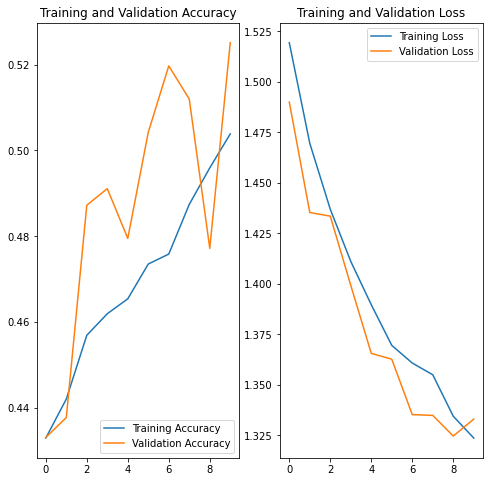

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
model.save_weights('resnet1')

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255)                                 
train_generator=train_datagen.flow_from_dataframe(dataframe=train_kfold,
                                            directory=TRAIN_PATH,
                                            x_col="Image",
                                            y_col="Class",
                                            subset="training",
                                            batch_size=128,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="categorical",
                                            target_size=(331,331))
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator=val_datagen.flow_from_dataframe(dataframe=val_kfold,
                                            directory=TRAIN_PATH,
                                            x_col="Image",
                                            y_col="Class",
                                            subset="training",
                                            batch_size=128,
                                            seed=42,
                                            shuffle=True,
                                            class_mode="categorical",
                                            target_size=(331,331))


Found 5176 validated image filenames belonging to 6 classes.
Found 1293 validated image filenames belonging to 6 classes.


In [46]:
resnet=tf.keras.applications.NASNetLarge(
    include_top=True, weights='imagenet'
)
x=resnet.layers[-2].output
fc1=Dense(6,activation='softmax')(x)
my_model=Model(inputs=resnet.input,outputs=fc1)
for l in my_model.layers[:-5]:
    #print(l)
    l.trainable = False
my_model.compile(optimizer='adam',loss ="categorical_crossentropy",metrics=["accuracy"])
my_model.fit(train_generator,steps_per_epoch=5176//128,validation_data=val_generator,validation_steps=1293//128,epochs=2,callbacks=[c1,c2])

Epoch 1/2
40/40 [==============================] - 4984s 125s/step - loss: 0.8187 - accuracy: 0.7484 - val_loss: 0.4319 - val_accuracy: 0.8625
Epoch 2/2
40/40 [==============================] - 4563s 114s/step - loss: 0.3466 - accuracy: 0.8920 - val_loss: 0.3313 - val_accuracy: 0.8930


In [48]:
my_model.save_weights('nasnet1')

In [53]:
# Let us make predictions with the Resnet50 and Nasnet models on val set and plot the ROC Curves 
# based on this appropriate threshold will be chosen for better classification


In [60]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 12294     
Total params: 23,600,006
Trainable params: 12,294
Non-trainable params: 23,587,712
_________________________________________________________________


In [61]:
my_model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_14[0][0]                   
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1560 (Activation)    (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_______________________________________________________________________________________